In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

# Params Optimization

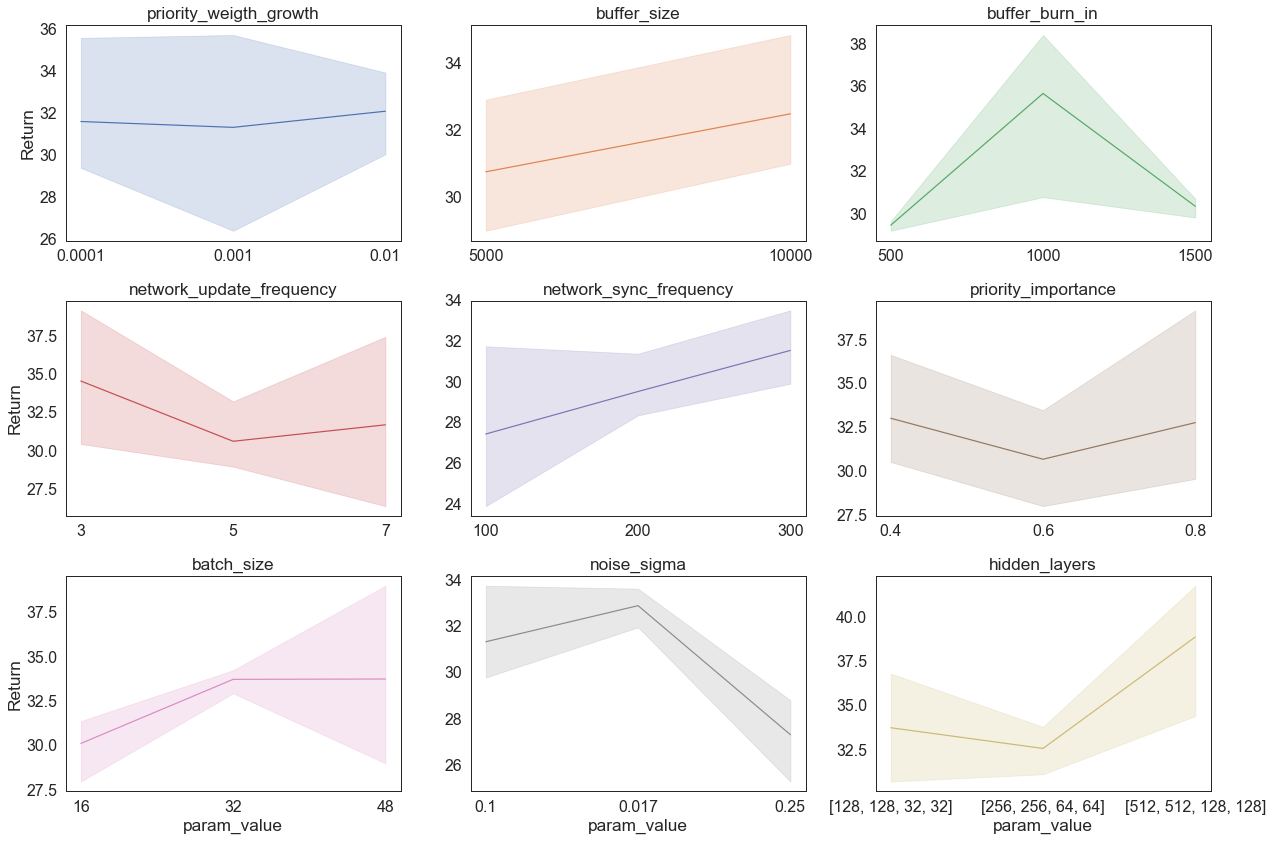

In [2]:
def plot_hyperparam_results(filenames: List[str]):
    df = pd.DataFrame()
    for filename in filenames:
        df = pd.concat([df, pd.read_csv(f'output/{filename}.csv', dtype={'param_value':str})])
    df = pd.concat([df[['Parameter Name', 'param_value', f'run_{i}']].rename(columns={f'run_{i}':'Return'}) for i in range(3)])
    
    g = sns.FacetGrid(df, col='Parameter Name', col_wrap=3, height=4, sharex=False, sharey=False, 
        hue='Parameter Name', despine=False, aspect=1.5)
    g.map(sns.lineplot, "param_value", 'Return', ci=95)
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    plt.tight_layout()
    plt.savefig(f"output/{''.join(filenames)}.pdf")

sns.set(context='paper', style='white', font_scale=1.8)
plot_hyperparam_results(['dueling_hyperparams2','dueling_hyperparams1', 'dueling_hyperparams3'])

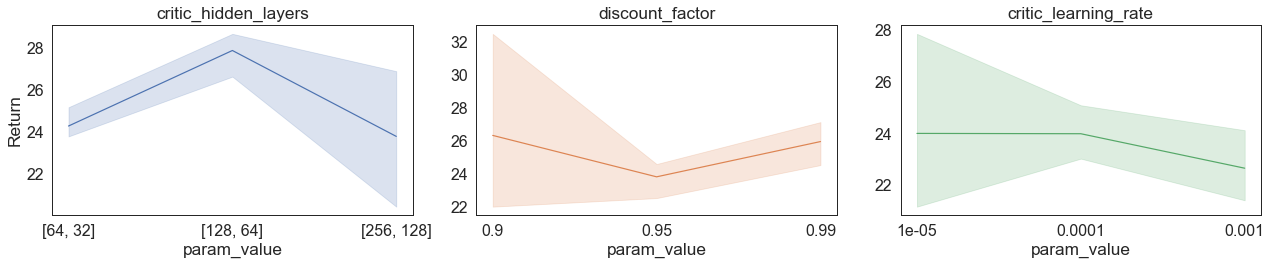

In [3]:
sns.set(context='paper', style='white', font_scale=1.8)
plot_hyperparam_results(['actorcritic_hyperparams'])

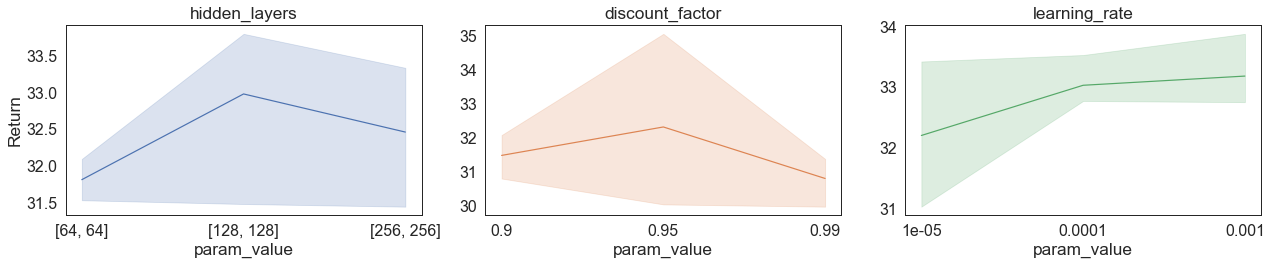

In [4]:
sns.set(context='paper', style='white', font_scale=1.8)
plot_hyperparam_results(['reinforce_hyperparams'])

# Execution Results

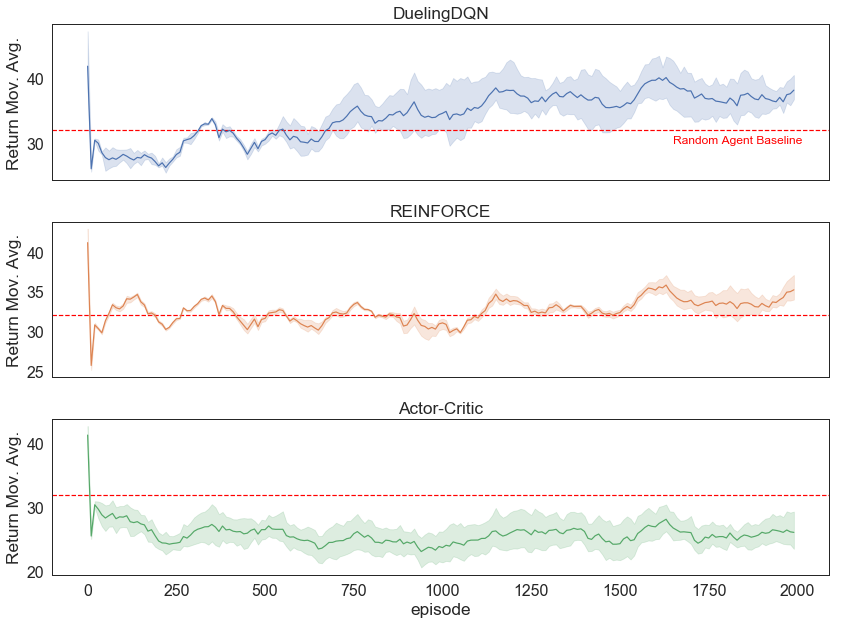

In [48]:
import numpy as np

def plot_execution_results(agent_results):
    
    data = pd.DataFrame()
    for result in agent_results:
        filename, agent_name = result
        df = pd.read_csv(f'output/{filename}.csv')\
            .query('metric == "moving_rewards" and episode % 10 == 0')\
            [['measurement', 'episode']]\
            .reset_index(drop=True)
        df['measurement'] = df.measurement.astype(np.float32)
        df['agent'] = agent_name
        data = pd.concat([data,df])
        
    g = sns.FacetGrid(data, col='agent', col_wrap=1, sharex=True,sharey=False, 
        hue='agent', despine=False, aspect=4, legend_out=True)
    g.map(plt.axhline, y=32, xmin=0, xmax=2000, ls='--', c='red',label='Random Agent Baseline')
    g.axes.flat[0].text(x=1650, y=30,s='Random Agent Baseline', fontsize='x-small',color='red')
    g.map(sns.lineplot, 'episode', 'measurement', ci=95)
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    for ax in g.axes.flat:
        ax.set(ylabel='Return Mov. Avg.')
    plt.savefig(f"output/combined_execution_results.pdf")
    
plot_execution_results([
    ('RainbowDQNAgent_optimized_results', 'DuelingDQN'),
    ('ReinforceAgent_optimized_results', 'REINFORCE'),
    ('ActorCriticAgent_optimized_results', 'Actor-Critic'),
])